In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
#Importing important libraries
import math
import yfinance as yf
import pandas_datareader.data as pdr
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
# Making tech list which we will use for this analysis
Tech_list = ['IMGN', 'AMD', 'F','UBER']

#Load data
yf.pdr_override()

start_date = '01-05-2000'
end_date = '20-05-2023'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

# Using for loop for grabing yahoo data and setting it in form of dataframe
for stock in Tech_list:
    globals()[stock] = df = pdr.get_data_yahoo(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
Company_list = [IMGN, AMD, F, UBER]
company_name = ['IMGN', 'AMD', 'F','UBER']
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name

In [ ]:
df = pd.concat(Company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-08,37.820000,38.930000,37.480000,38.830002,38.830002,30992100,UBER
2023-05-09,38.490002,38.580002,37.904999,38.189999,38.189999,19387000,UBER
2023-05-10,38.599998,38.950001,38.169998,38.790001,38.790001,19531500,UBER
2023-05-11,38.639999,39.180000,38.340000,38.419998,38.419998,16515600,UBER
2023-05-12,38.639999,39.230000,38.200001,38.450001,38.450001,21614700,UBER
2023-05-15,38.340000,38.480000,37.990002,38.139999,38.139999,17826600,UBER
2023-05-16,37.930000,38.150002,37.439999,37.439999,37.439999,21829100,UBER
2023-05-17,37.730000,37.955002,37.360001,37.840000,37.840000,19534400,UBER
2023-05-18,37.980000,39.490002,37.759998,39.250000,39.250000,27828100,UBER


In [ ]:
# Summary Stats
UBER.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1.015000e+03
mean,36.997728,37.748123,36.176276,36.963537,36.963537,2.547836e+07
std,9.538667,9.618897,9.383783,9.482043,9.482043,1.646995e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,30.115000,30.663500,29.413000,30.125000,30.125000,1.579240e+07
50%,34.349998,35.009998,33.570000,34.369999,34.369999,2.172010e+07
75%,43.715000,44.349998,42.955000,43.570000,43.570000,3.033600e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


In [ ]:
UBER.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2019-05-10 to 2023-05-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1015 non-null   float64
 1   High          1015 non-null   float64
 2   Low           1015 non-null   float64
 3   Close         1015 non-null   float64
 4   Adj Close     1015 non-null   float64
 5   Volume        1015 non-null   int64  
 6   company_name  1015 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.4+ KB


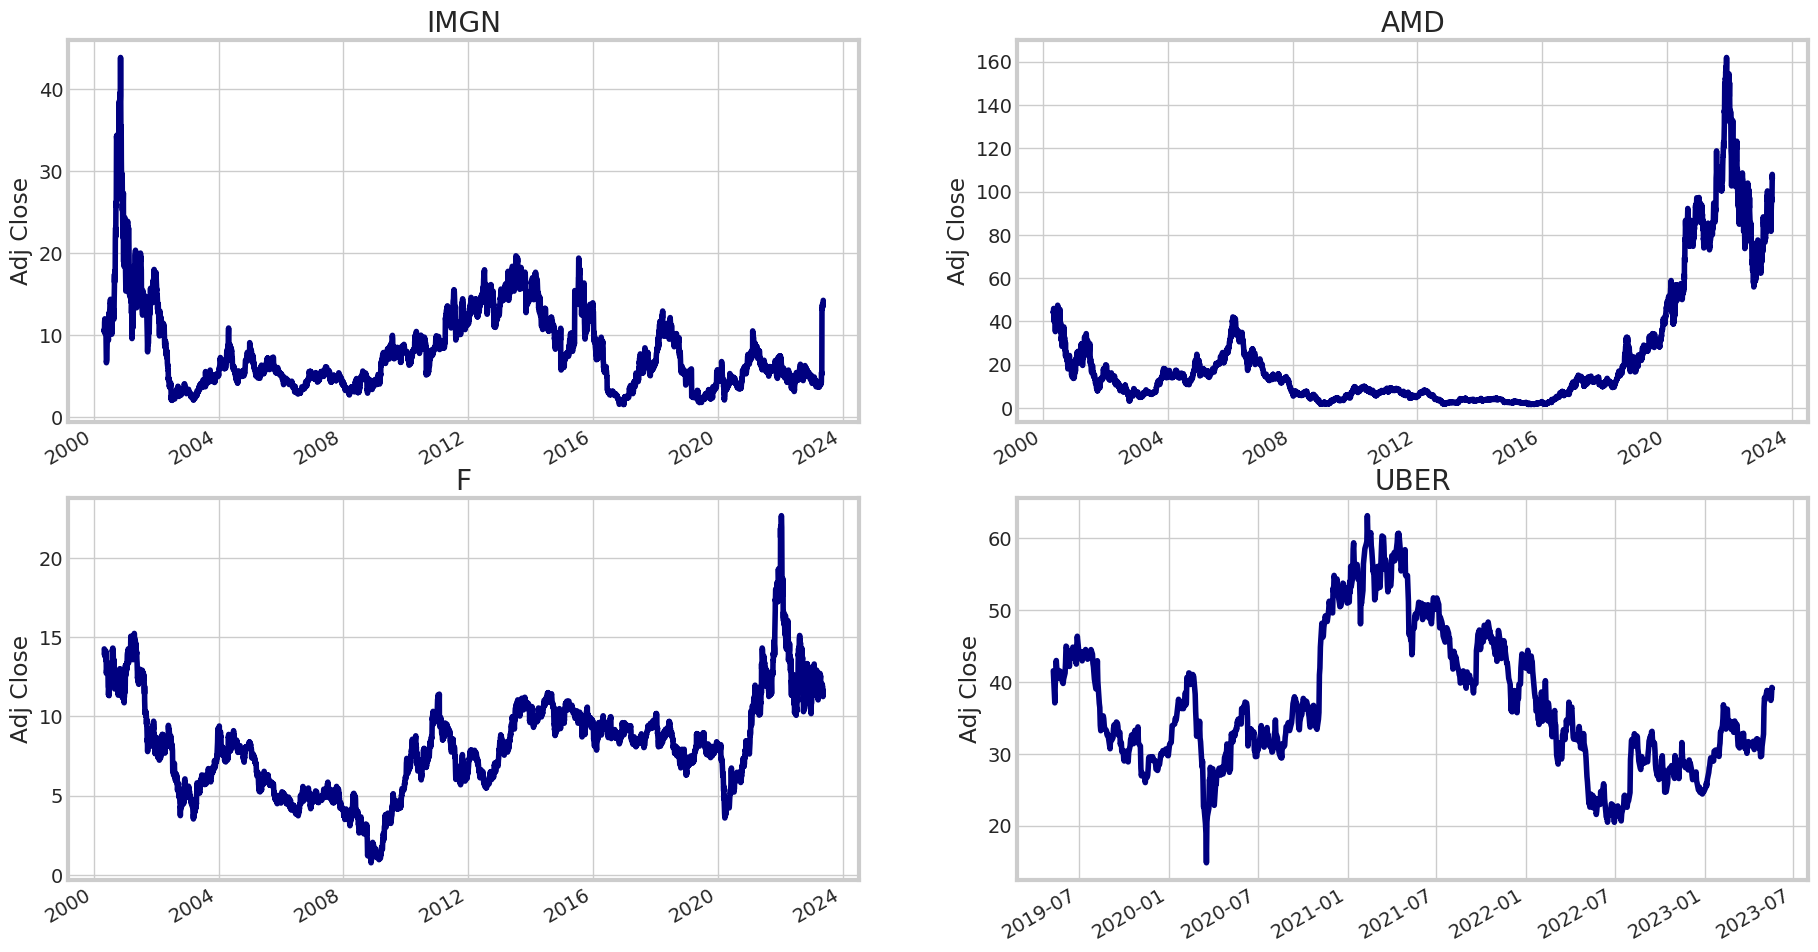

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Adj Close'].plot(color='navy')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

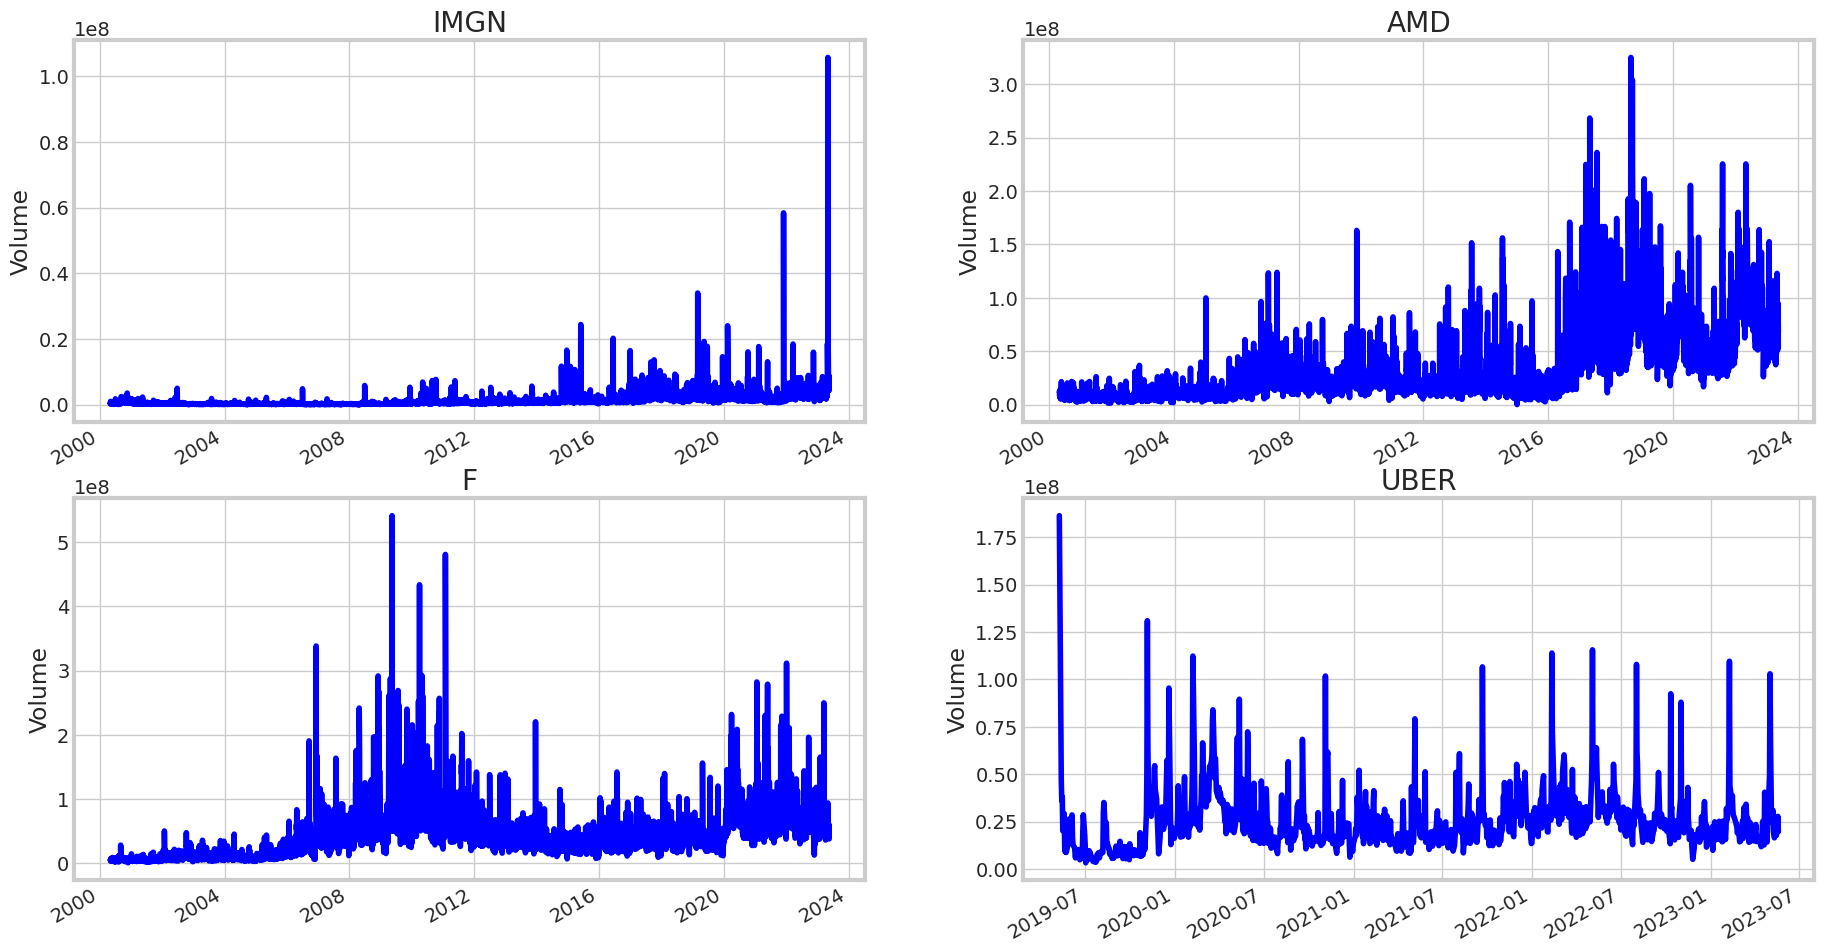

In [ ]:
# Visualising total volume of stock being trade each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Volume'].plot(color='blue')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
print(f'IMGN: {IMGN.columns}')
print(f'AMD: {AMD.columns}')
print(f'F: {F.columns}')
print(f'UBER: {UBER.columns}')

IMGN: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
AMD: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
F: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
UBER: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


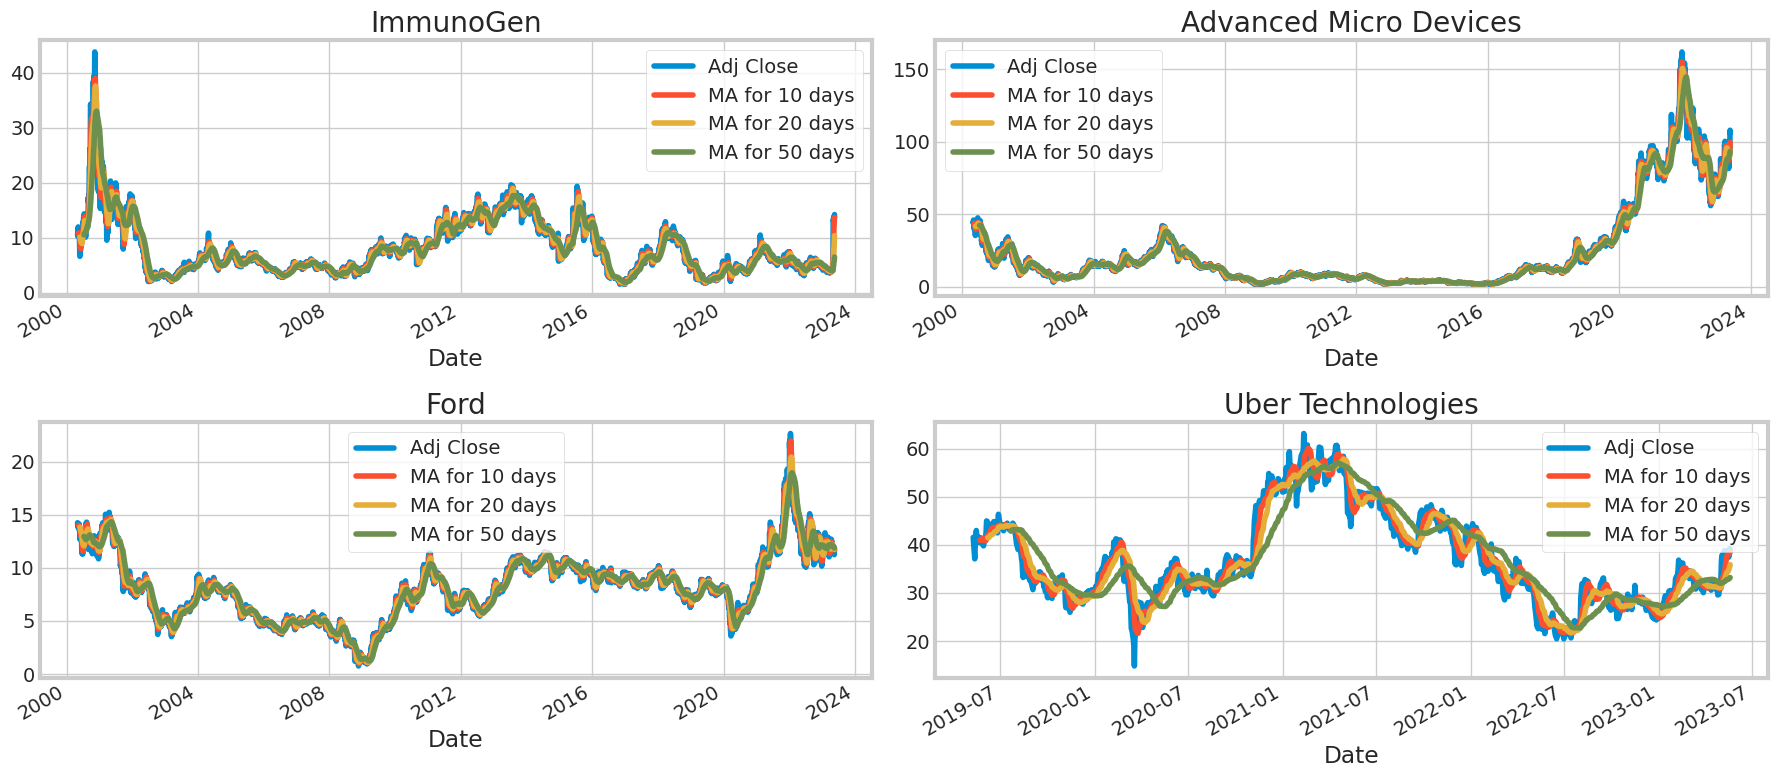

In [ ]:
# Visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(18)

IMGN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ImmunoGen')

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Advanced Micro Devices')

F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Ford')

UBER[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Uber Technologies')

fig.tight_layout()

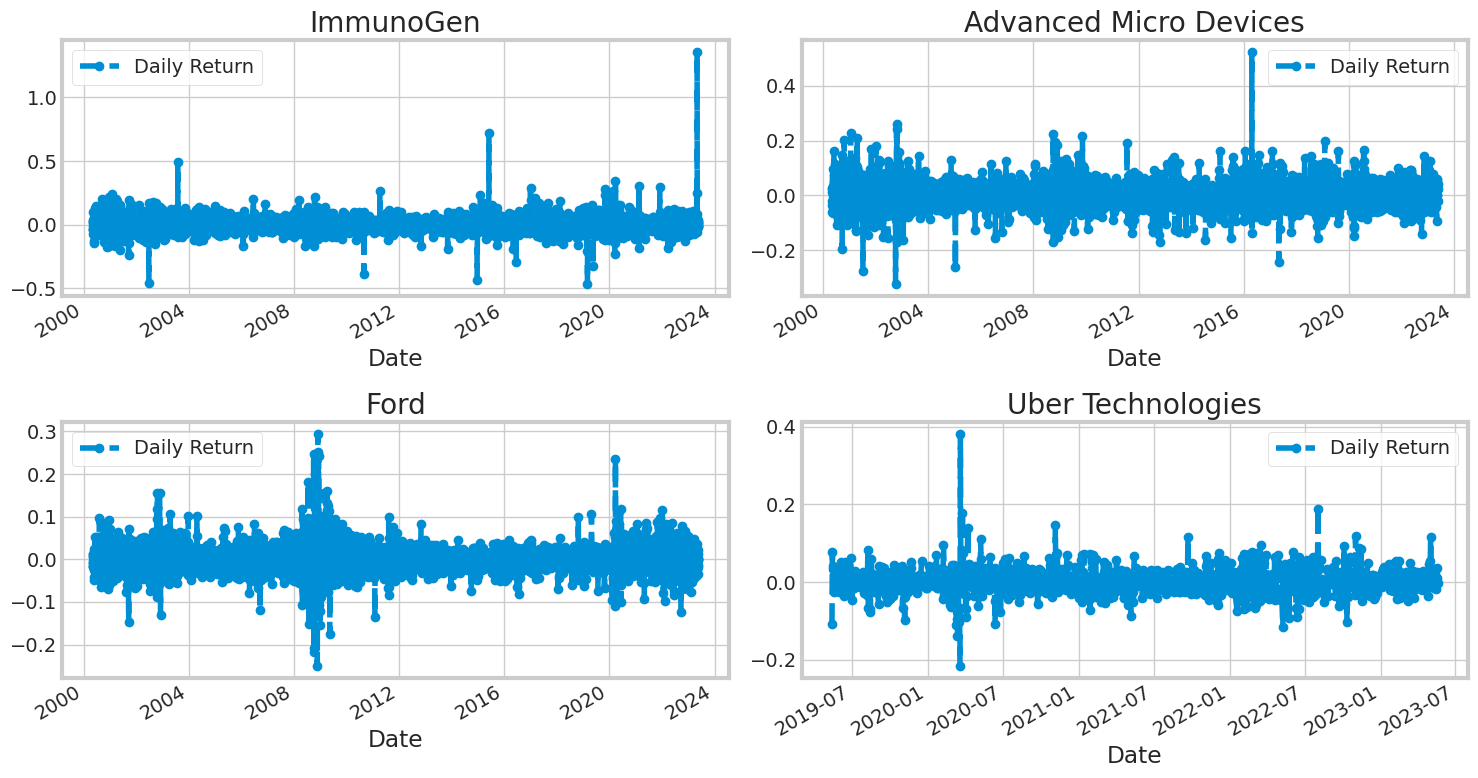

In [ ]:
# Using pct_change to find the percent change for each day
for company in Company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

IMGN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ImmunoGen')

AMD['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Advanced Micro Devices')

F['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Ford')

UBER['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Uber Technologies')

fig.tight_layout()

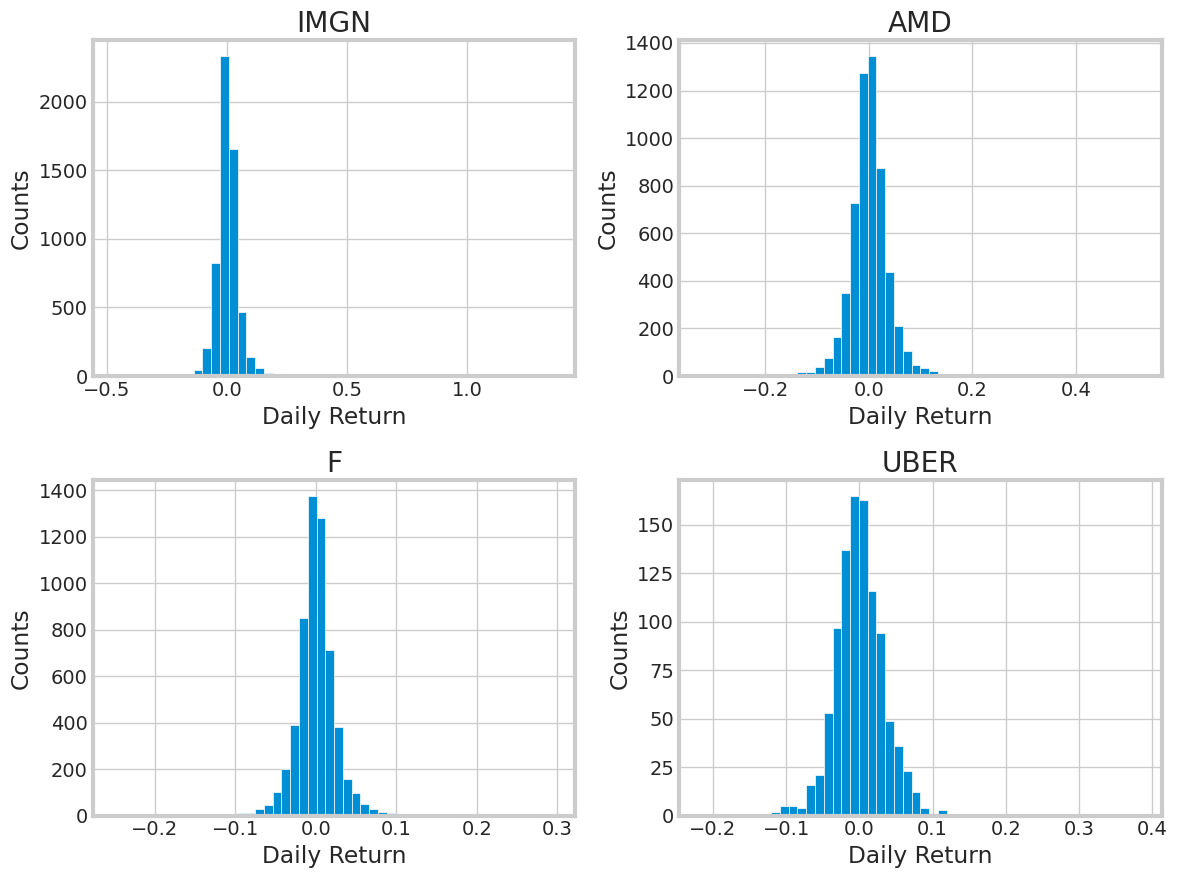

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

<ipython-input-15-ae8c959a3fef>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
<ipython-input-15-ae8c959a3fef>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
<ipython-input-15-

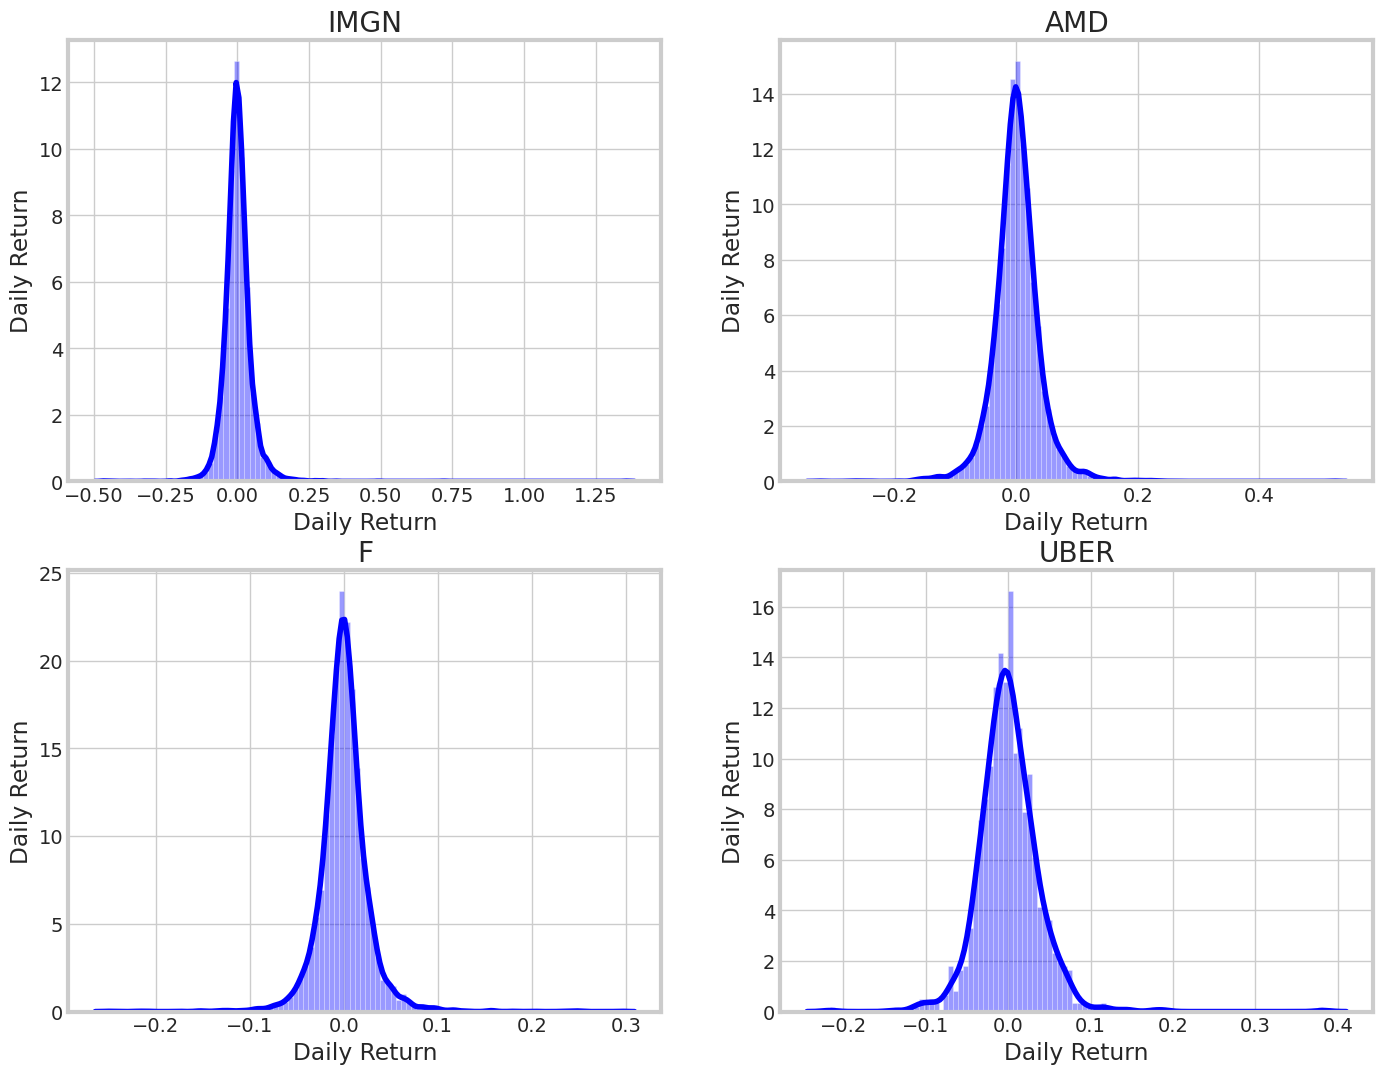

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(15, 12))

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

In [ ]:
closing_df = df = pdr.get_data_yahoo(Tech_list, start, end)['Adj Close']
# Printing first five line
closing_df.tail()

[*********************100%***********************]  4 of 4 completed


,AMD,F,IMGN,UBER
Date,,,,
2023-05-15,97.400002,11.64,13.48,38.139999
2023-05-16,101.480003,11.25,13.69,37.439999
2023-05-17,103.750000,11.50,13.90,37.840000
2023-05-18,107.930000,11.64,13.73,39.250000
2023-05-19,105.820000,11.65,14.25,39.180000


In [ ]:
# Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

,AMD,F,IMGN,UBER
Date,,,,
2023-05-15,0.022465,-0.002571,-0.014620,-0.008062
2023-05-16,0.041889,-0.033505,0.015579,-0.018353
2023-05-17,0.022369,0.022222,0.015340,0.010684
2023-05-18,0.040289,0.012174,-0.012230,0.037262
2023-05-19,-0.019550,0.000859,0.037873,-0.001783


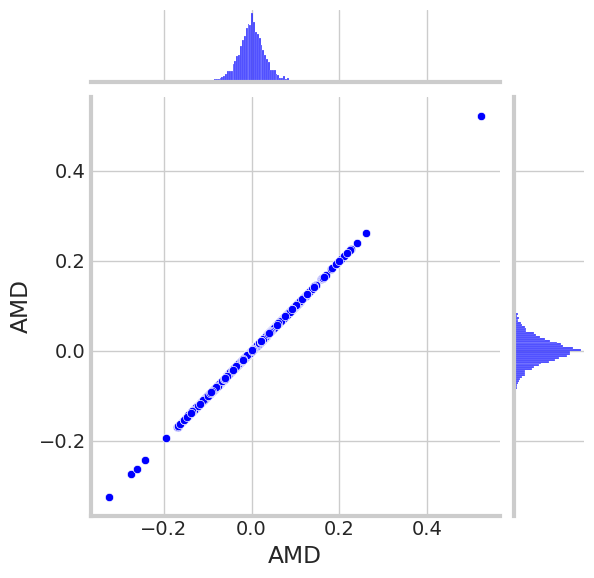

In [ ]:
import seaborn as sns

# Comparing Tesla to itself, which should show a perfectly linear relationship
sns.jointplot(x='AMD', y='AMD', data=tech_rets, kind='scatter', color='blue')


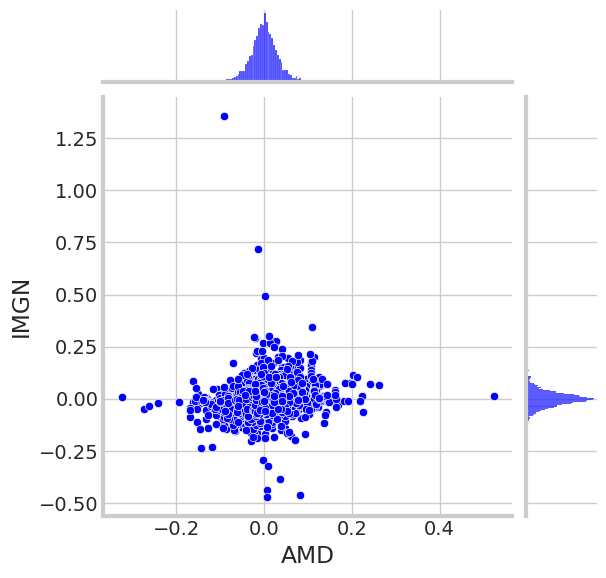

In [ ]:
# Using joinplot to compare the daily returns of Advanced Micro Devices (AMD) and ImmunoGen (IMGN)
sns.jointplot(x='AMD', y='IMGN', data=tech_rets, kind='scatter', color = "blue")

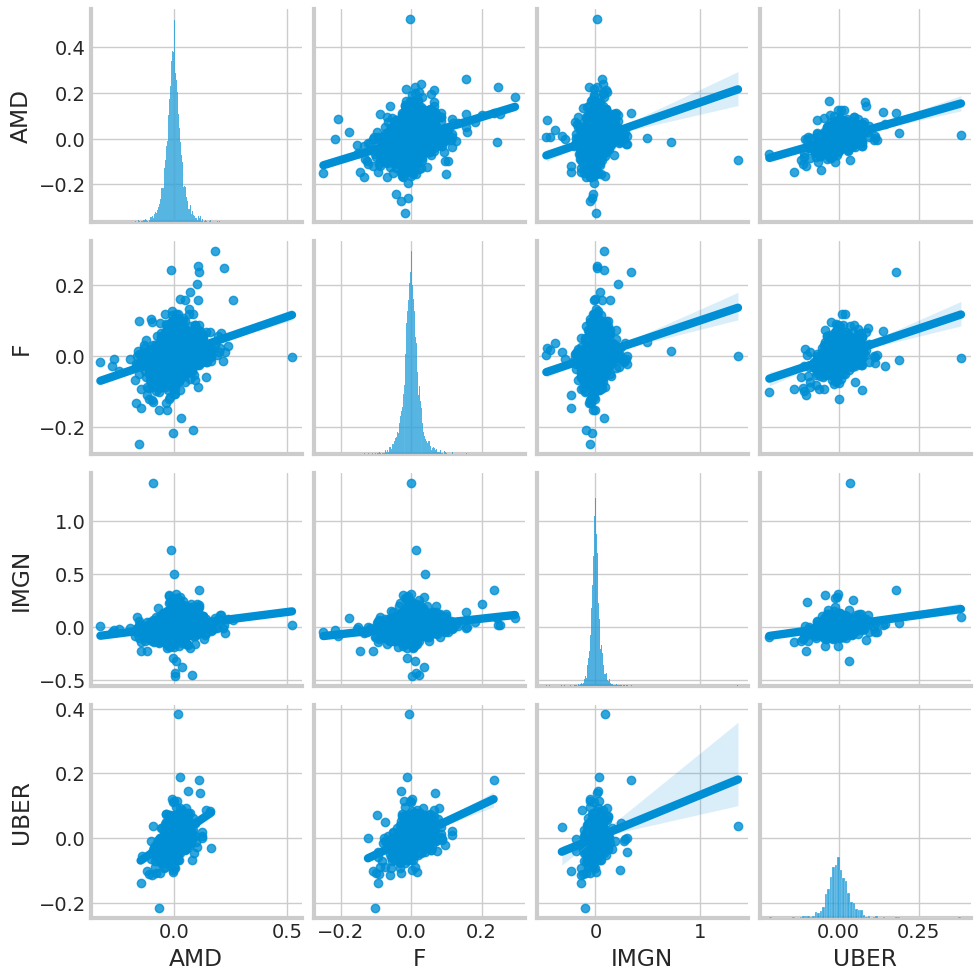

In [ ]:
# Simply calling pairplot on many DataFrame for automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

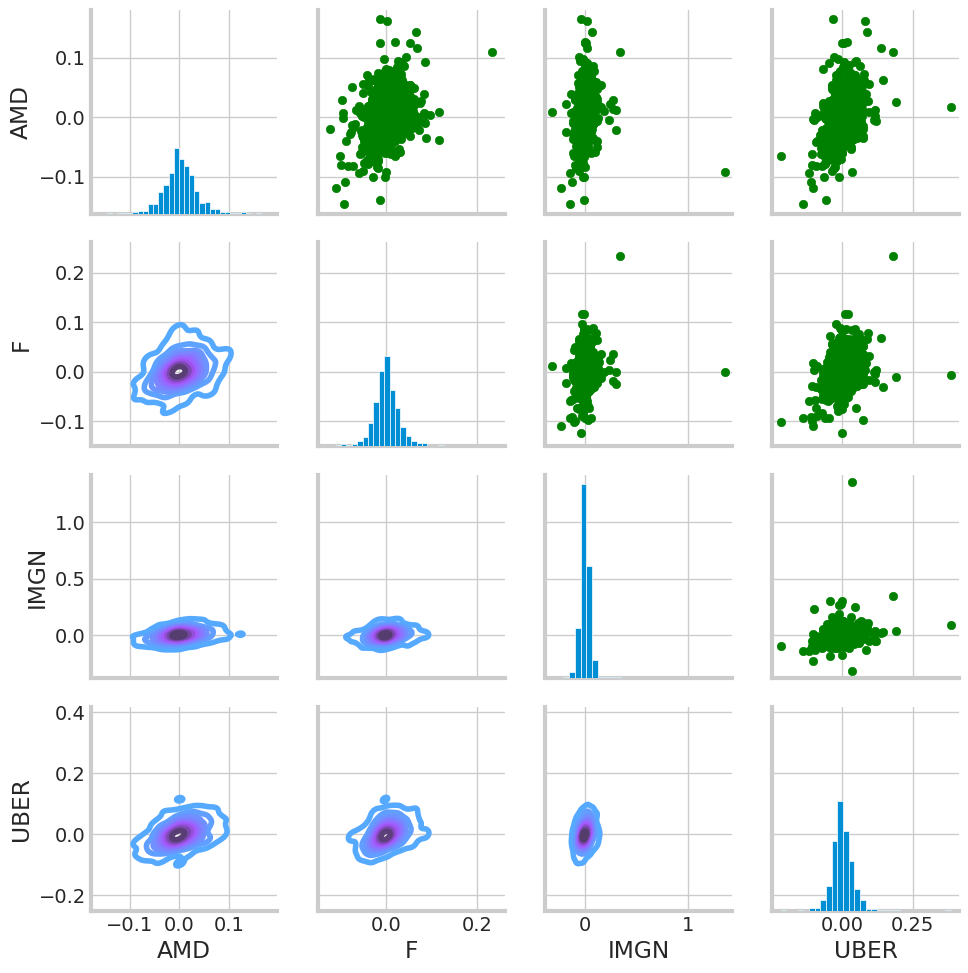

In [ ]:
# Set up figures by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper that can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='green')

# It can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally, defining the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

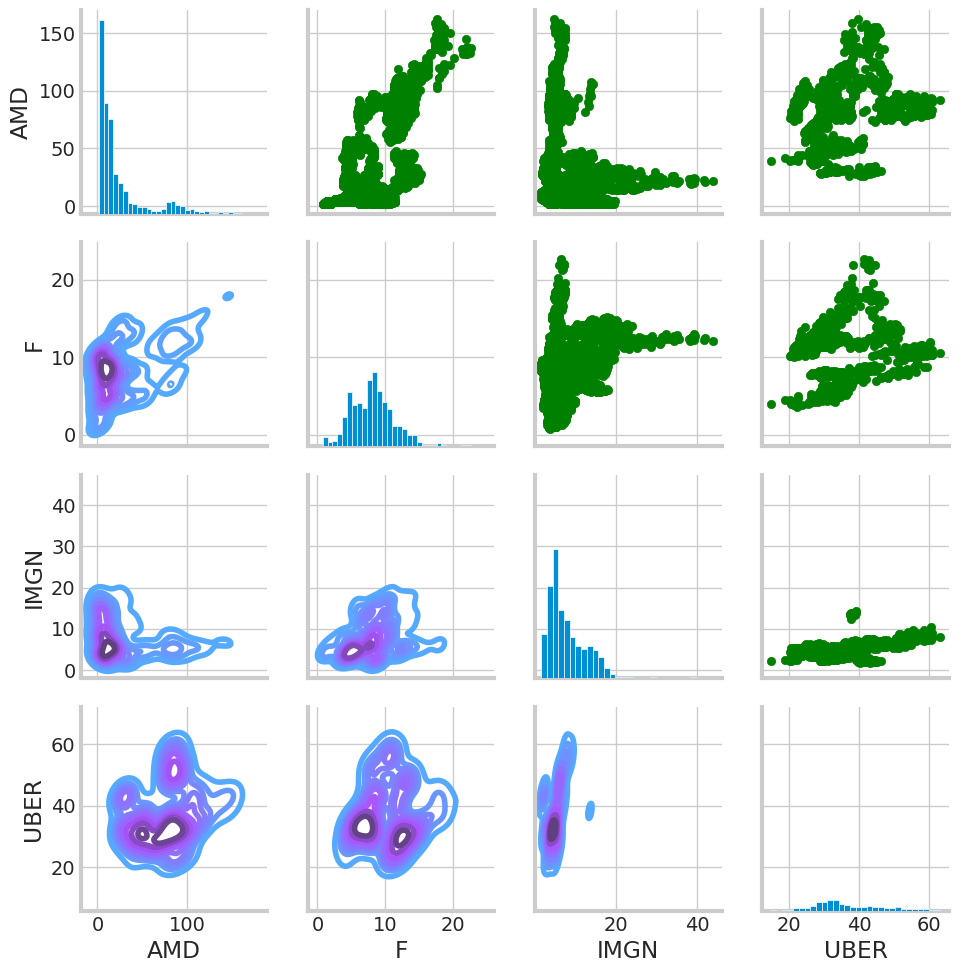

In [ ]:
# Set up figures by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper that can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='green')

# Also defining the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally, defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

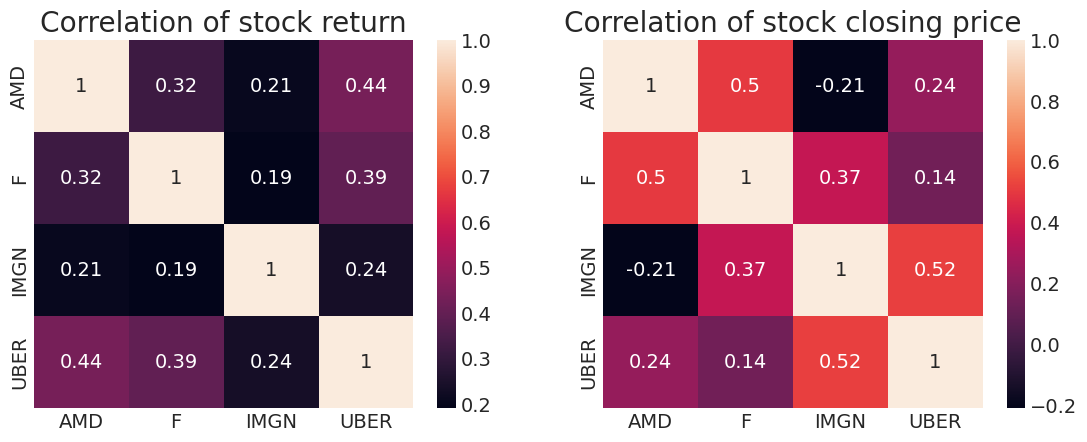

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Correlation of stock closing price')

Text(0.5, 1.0, 'Correlation of stock return')

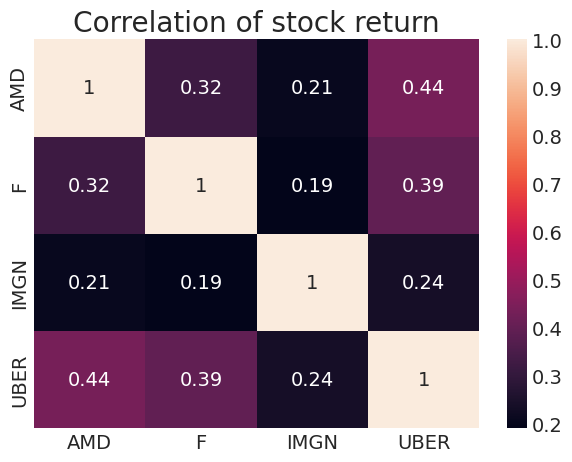

In [ ]:
# # Using seabron for a quick correlation plot for the daily returns
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Correlation of stock return')

Text(0.5, 1.0, 'Correlation of stock closing price')

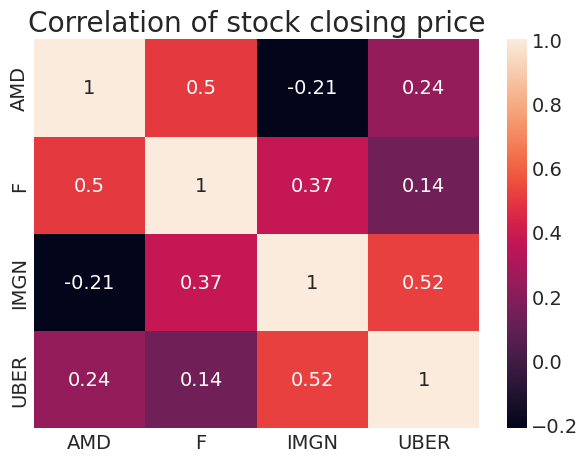

In [ ]:
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Correlation of stock closing price')

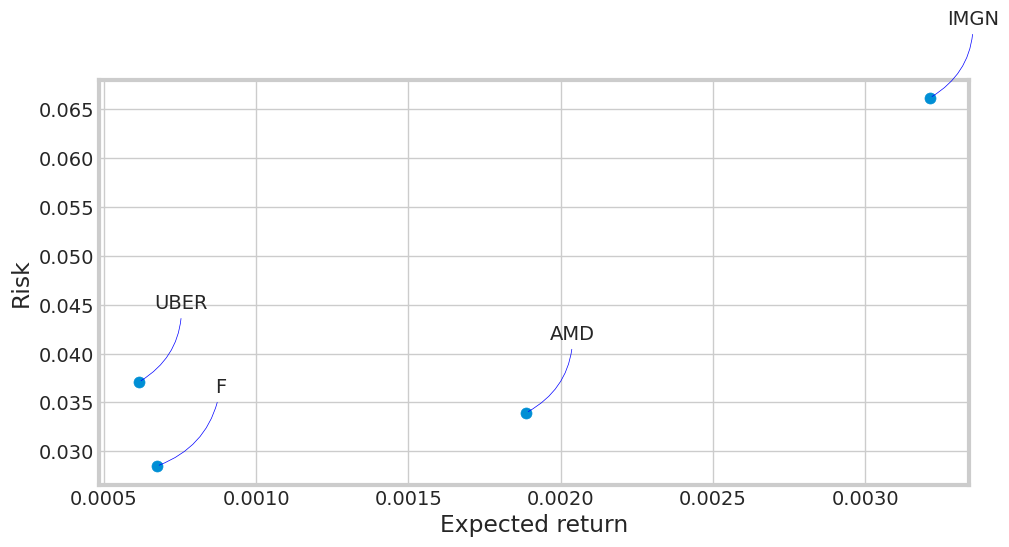

In [ ]:
# Defining a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(10, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
#Load data
yf.pdr_override()

start_date = '01-05-2000'
end_date = '20-05-2023'

company = 'IMGN'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')
df = pdr.get_data_yahoo(company, start=start, end=end)

df.style.format({"Date": lambda t: t.strftime("%d-%m-%Y")})

print(f'Name of stock code: {company}')

df.round(2)

[*********************100%***********************]  1 of 1 completed
Name of stock code: IMGN


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-01,11.00,11.25,10.25,10.50,10.50,351100
2000-05-02,10.56,11.50,10.44,10.75,10.75,581800
2000-05-03,11.00,11.25,10.00,10.38,10.38,288300
2000-05-04,11.50,11.50,10.25,10.50,10.50,947300
2000-05-05,11.38,12.00,10.94,11.56,11.56,983000
...,...,...,...,...,...,...
2023-05-15,13.79,14.30,13.35,13.48,13.48,6240600
2023-05-16,13.10,13.87,12.92,13.69,13.69,6461500
2023-05-17,13.75,14.02,13.50,13.90,13.90,5513000


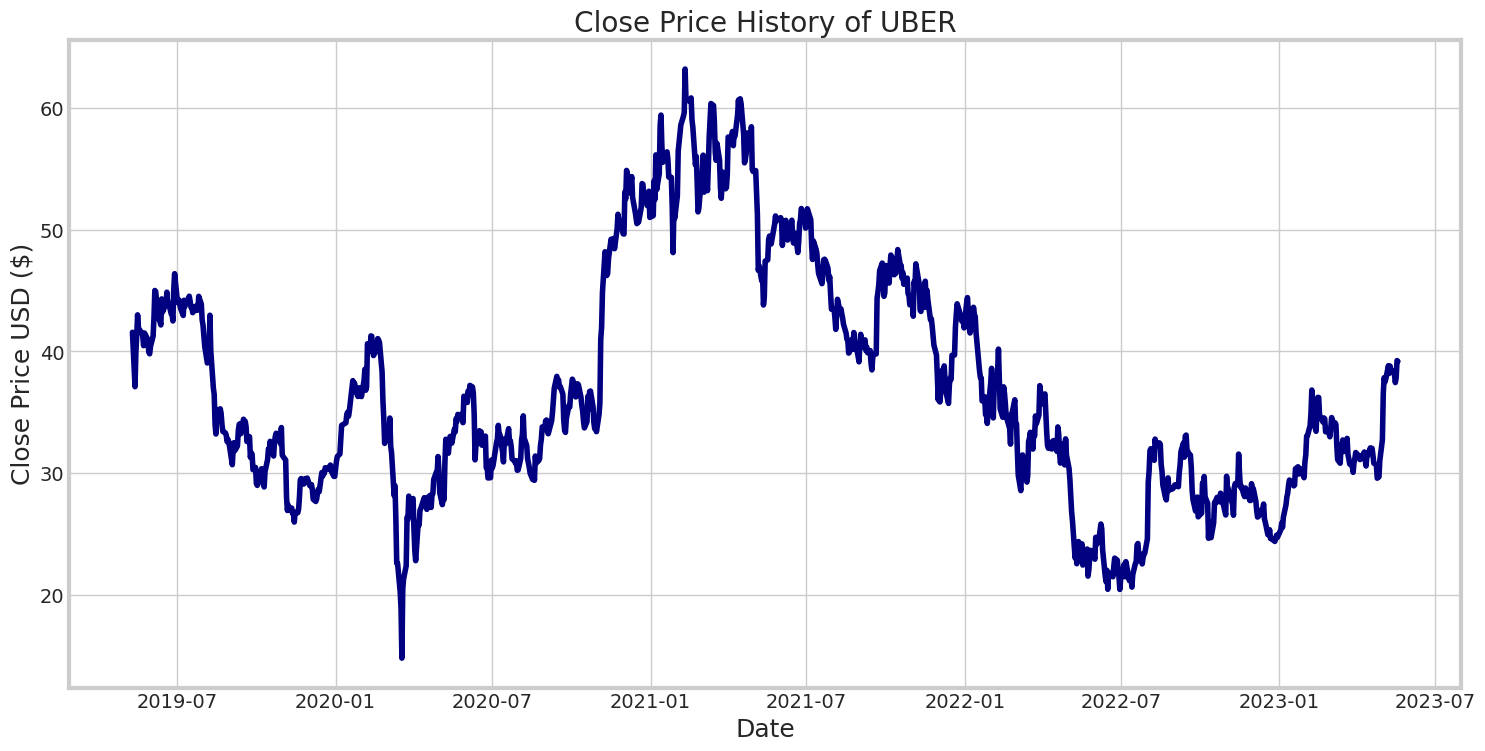

In [ ]:
# Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History of ' + company)
plt.plot(df['Close'], color='navy')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

812

In [ ]:
#Scaling the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.55314309],
       [0.4607113 ],
       [0.5198511 ],
       ...,
       [0.47601324],
       [0.50516956],
       [0.50372209]])

In [ ]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.55314309, 0.4607113 , 0.5198511 , 0.5473532 , 0.58271298,
       0.56017369, 0.55355666, 0.55169562, 0.54652605, 0.53039705,
       0.55190236, 0.5403226 , 0.51943752, 0.51654258, 0.52915632,
       0.54652605, 0.57754342, 0.62406948, 0.62241518, 0.60669975,
       0.57464848, 0.57133997, 0.56555   , 0.60980152, 0.58746897,
       0.59884199, 0.60049629, 0.62117454, 0.60049629, 0.60339123,
       0.58457403, 0.58457403, 0.57237386, 0.62675767, 0.65260548,
       0.60897437, 0.60339123, 0.60814722, 0.59367243, 0.58167909,
       0.6075269 , 0.59718777, 0.60318448, 0.60318448, 0.61435068,
       0.60607943, 0.59553348, 0.59739452, 0.58643508, 0.59698095,
       0.59015717, 0.59842842, 0.59098431, 0.61414393, 0.60090986,
       0.57423491, 0.56492968, 0.54776678, 0.52894958, 0.5010339 ])]
[0.5031017684860575]

[array([0.55314309, 0.4607113 , 0.5198511 , 0.5473532 , 0.58271298,
       0.56017369, 0.55355666, 0.55169562, 0.54652605, 0.53039705,
       0.55190236, 0.5403226 , 0.519

In [ ]:
# Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# Building the LSTM network model
model = Sequential()

#RNN:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_callback = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.1)
model.save('/content/driver/My Drive/Colab/models/stock_' + company + '.h5')

Epoch 1/50
22/22 [==============================] - 9s 86ms/step - loss: 0.0548 - val_loss: 0.0411
Epoch 2/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0160 - val_loss: 0.0073
Epoch 3/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0109 - val_loss: 0.0054
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0111 - val_loss: 0.0057
Epoch 5/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0108 - val_loss: 0.0028
Epoch 6/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0101 - val_loss: 0.0046
Epoch 7/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0092 - val_loss: 0.0024
Epoch 8/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0065
Epoch 9/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 10/50
22/22 [==============================] - 0s 22ms/step - loss: 0.0090 - val_loss: 0.0066
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

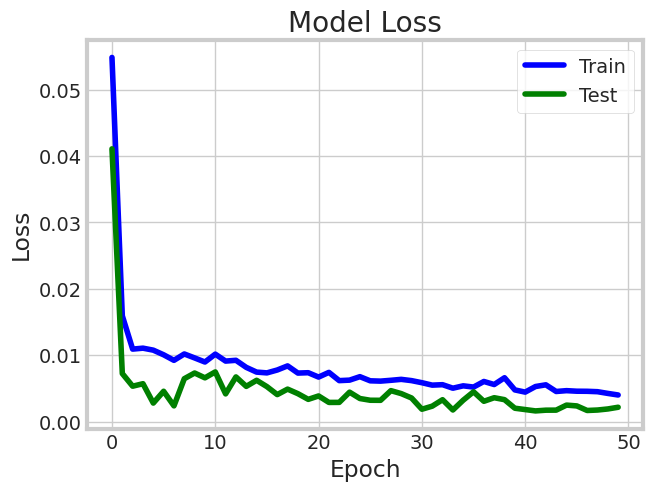

In [ ]:
# Plotting the model loss
def plot_loss(loss, val_loss):
  plt.plot(loss, label='loss',color='blue')
  plt.plot(val_loss, label='val_loss',color='green')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.grid(True)

plot_loss(model_callback.history['loss'][0:], model_callback.history['val_loss'][0:])
plt.show()  # Display the plot

In [ ]:
# Testing data set
test_data = scaled_data[training_data_len - 60: , : ]
# Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
# Converting x_test to a numpy array
x_test = np.array(x_test)

# Reshaping the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Undo scaling

7/7 [==============================] - 2s 8ms/step


Formula in this link: https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

In [ ]:
# Calculaing the value of MSE, MAE and RMSE
MSE = np.mean((predictions- y_test)**2)
MAE = np.mean(abs(predictions- y_test))
RMSE = np.sqrt(np.mean(((predictions- y_test)**2)))

print(f'The Mean Squared Error is: {MSE}')
print(f'The Mean Absolute Error is: {MAE}')
print(f'The Root Mean Squared Error: {RMSE}')

The Mean Squared Error is: 3.8521523480431004
The Mean Absolute Error is: 1.4381267848273216
The Root Mean Squared Error: 1.9626900794682538


<ipython-input-152-0c177ab75609>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


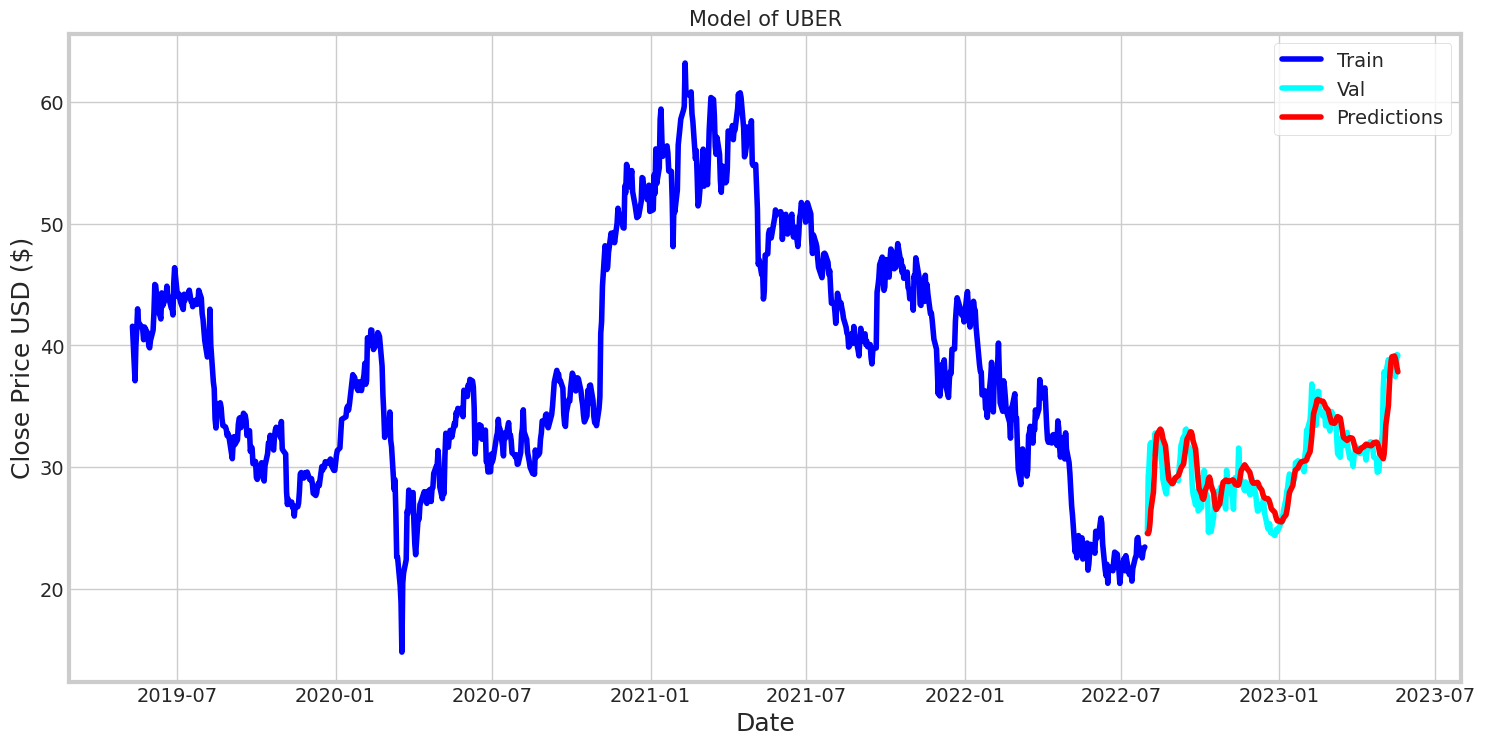

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title(f'Model of {company}', fontsize='15')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='blue')
plt.plot(valid['Close'], color='cyan')
plt.plot(valid['Predictions'], color='red')
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
print(valid)

                Close  Predictions
Date                              
2022-08-01  24.600000    24.566132
2022-08-02  29.250000    24.546669
2022-08-03  30.190001    24.769802
2022-08-04  31.850000    25.398140
2022-08-05  32.009998    26.492920
...               ...          ...
2023-05-15  38.139999    39.129181
2023-05-16  37.439999    38.940510
2023-05-17  37.840000    38.573174
2023-05-18  39.250000    38.143528
2023-05-19  39.180000    37.832260

[203 rows x 2 columns]


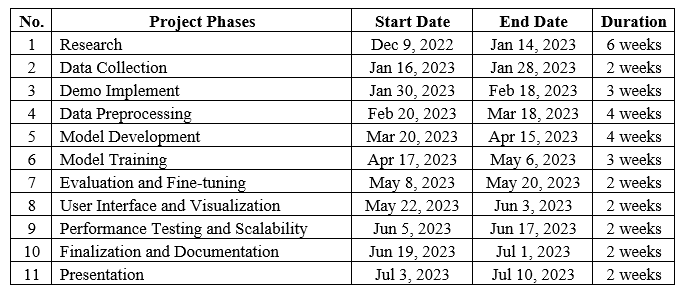

# To draw Gantt in the correct direction, the input time must go backwards like below

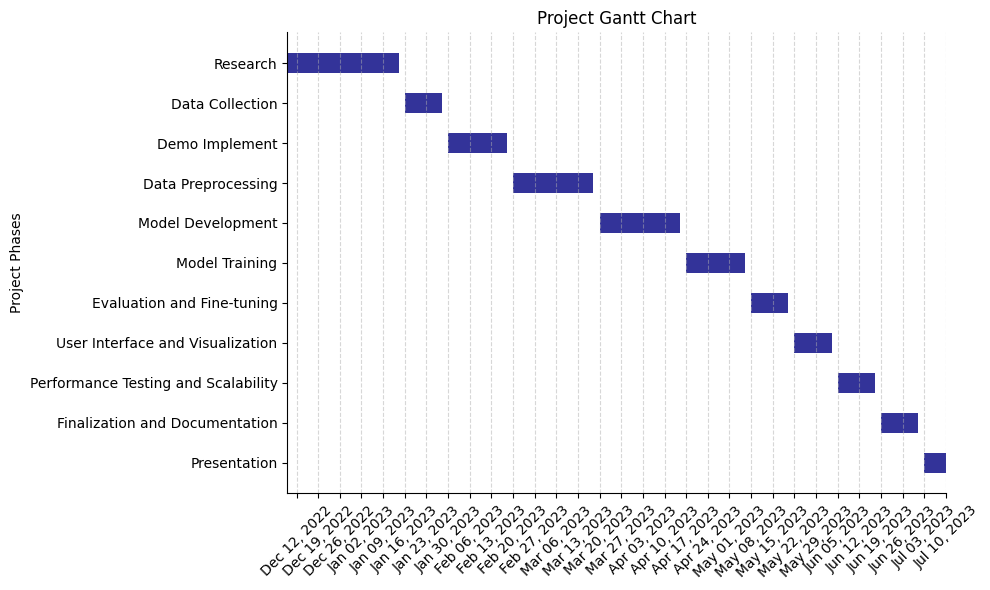

In [1]:
import matplotlib.pyplot as plt
import datetime

# Define the project phases and their corresponding dates
phases = ['Presentation', 'Finalization and Documentation', 'Performance Testing and Scalability',
          'User Interface and Visualization', 'Evaluation and Fine-tuning', 'Model Training',
          'Model Development', 'Data Preprocessing', 'Demo Implement', 'Data Collection', 'Research']

# start_dates = [datetime.datetime(2022, 12, 9), datetime.datetime(2023, 1, 16), datetime.datetime(2023, 1, 30),
#                datetime.datetime(2023, 2, 20), datetime.datetime(2023, 3, 20), datetime.datetime(2023, 4, 17),
#                datetime.datetime(2023, 5, 8), datetime.datetime(2023, 5, 22), datetime.datetime(2023, 5, 29),
#                datetime.datetime(2023, 6, 5), datetime.datetime(2023, 6, 12)]

start_dates = [datetime.datetime(2023, 7, 3), datetime.datetime(2023, 6, 19), datetime.datetime(2023, 6, 5),
               datetime.datetime(2023, 5, 22), datetime.datetime(2023, 5, 8), datetime.datetime(2023, 4, 17),
               datetime.datetime(2023, 3, 20), datetime.datetime(2023, 2, 20), datetime.datetime(2023, 1, 30),
               datetime.datetime(2023, 1, 16), datetime.datetime(2022, 12, 9)]


# end_dates = [datetime.datetime(2023, 1, 14), datetime.datetime(2023, 1, 28), datetime.datetime(2023, 2, 18),
#              datetime.datetime(2023, 3, 18), datetime.datetime(2023, 4, 15), datetime.datetime(2023, 5, 6),
#              datetime.datetime(2023, 5, 20), datetime.datetime(2023, 5, 27), datetime.datetime(2023, 6, 3),
#              datetime.datetime(2023, 6, 10), datetime.datetime(2023, 6, 17)]

end_dates = [datetime.datetime(2023, 7, 10), datetime.datetime(2023, 7, 1), datetime.datetime(2023, 6, 17),
             datetime.datetime(2023, 6, 3), datetime.datetime(2023, 5, 20), datetime.datetime(2023, 5, 6),
             datetime.datetime(2023, 4, 15), datetime.datetime(2023, 3, 18), datetime.datetime(2023, 2, 18),
             datetime.datetime(2023, 1, 28), datetime.datetime(2023, 1, 14)]


# Create a Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the tasks as horizontal bars
for i in range(len(phases)):
    ax.barh(phases[i], end_dates[i] - start_dates[i], left=start_dates[i], height=0.5, align='center',
            color='navy', alpha=0.8)

# Set the x-axis limit based on the project duration
project_start = min(start_dates)
project_end = max(end_dates)
ax.set_xlim(project_start, project_end)

# Format the x-axis tick labels as dates
date_format = "%b %d, %Y"
date_locator = plt.matplotlib.dates.WeekdayLocator(byweekday=plt.matplotlib.dates.MO)
date_formatter = plt.matplotlib.dates.DateFormatter(date_format)
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

# Set the y-axis label and title
ax.set_ylabel('Project Phases')
ax.set_title('Project Gantt Chart')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the gridlines and set their style
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Display the Gantt chart
plt.tight_layout()
plt.show()